<a href="https://colab.research.google.com/github/iotpelican/ml-llm-course-work/blob/main/ml_w02_class_excercise_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Part 1: Age Data Binning**

Generate random age data for 100 samples and perform binning to categorize
ages into different groups (e.g., 0-18, 19-35, 36-50, 51+).

In [ ]:
import numpy as np
import pandas as pd

# 1. Generate random age data for 100 samples
np.random.seed(42) # for reproducibility
ages = np.random.randint(0, 91, 100) # Ages from 0 to 90

# Create a DataFrame for the ages
age_df = pd.DataFrame({'Age': ages})

# 2. Define the age bins and labels
bins = [0, 18, 35, 50, np.inf] # np.inf for the upper bound of the last bin
labels = ['0-18', '19-35', '36-50', '51+']

# 3. Perform binning to categorize ages
age_df['Age_Category'] = pd.cut(age_df['Age'], bins=bins, labels=labels, right=True, include_lowest=True)

# 4. Display the distribution of ages within these bins
print("Distribution of Ages by Category:\n")
print(age_df['Age_Category'].value_counts().sort_index().to_markdown(numalign="left", stralign="left"))

# Display the first few rows of the DataFrame with raw and binned ages
print("\nFirst 10 rows of the generated age data with categories:\n")
print(age_df.head(10).to_markdown(index=False, numalign="left", stralign="left"))

Distribution of Ages by Category:

| Age_Category   | count   |
|:---------------|:--------|
| 0-18           | 21      |
| 19-35          | 14      |
| 36-50          | 15      |
| 51+            | 50      |

First 10 rows of the generated age data with categories:

| Age   | Age_Category   |
|:------|:---------------|
| 51    | 51+            |
| 14    | 0-18           |
| 71    | 51+            |
| 60    | 51+            |
| 20    | 19-35          |
| 82    | 51+            |
| 86    | 51+            |
| 74    | 51+            |
| 74    | 51+            |
| 87    | 51+            |


**Part 2: Generate Random Data and Create Plots**

Create a dataset with 100 random samples and generate four different plots:
scatter plot, pie chart, histogram, and box plot.

Tools: numpy, pandas, matplotlib

First 5 rows of the generated random dataset:
| Feature_X   | Feature_Y   | Category   | Value_for_Histogram   |
|:------------|:------------|:-----------|:----------------------|
| 51          | 23          | C          | 38.2512               |
| 92          | 25          | B          | 45.1691               |
| 14          | 88          | D          | 62.2028               |
| 71          | 59          | C          | 31.537                |
| 60          | 40          | A          | 53.4119               |

Generated scatter_plot.png, pie_chart.png, histogram_plot.png, and box_plot.png.


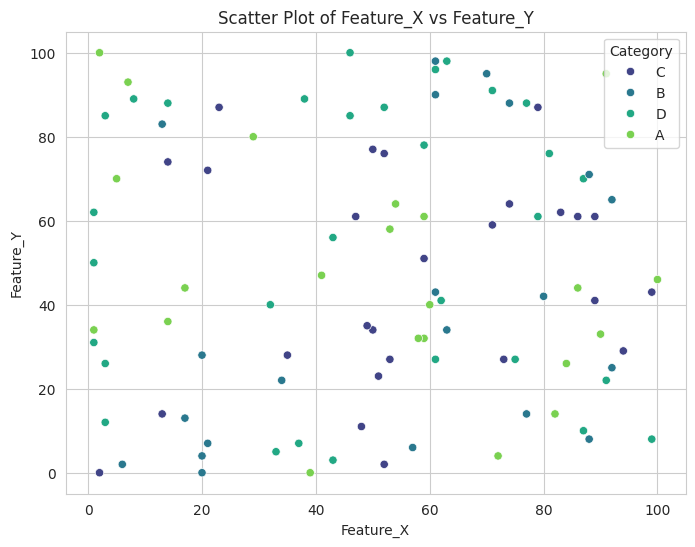

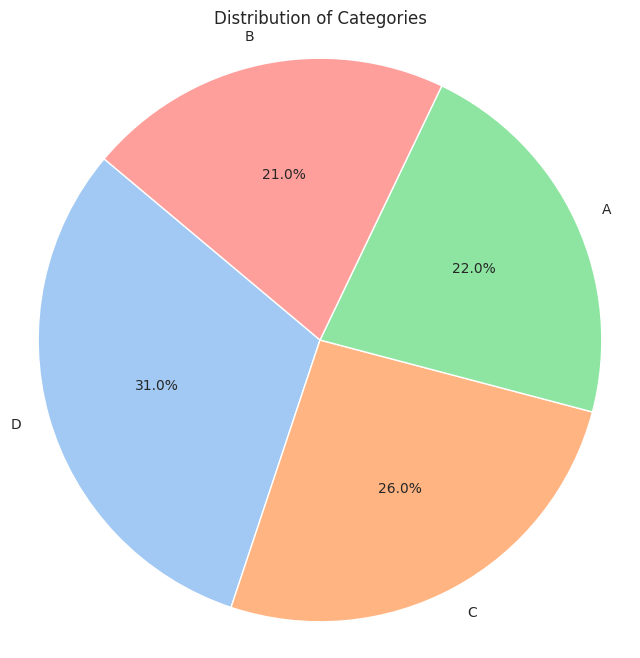

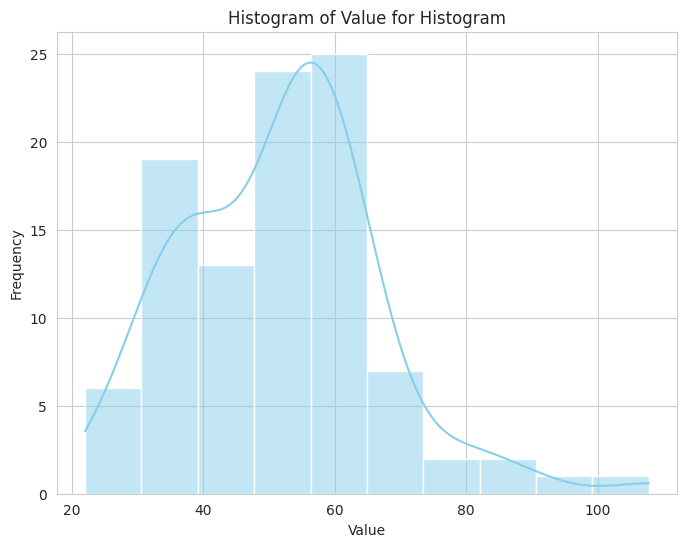

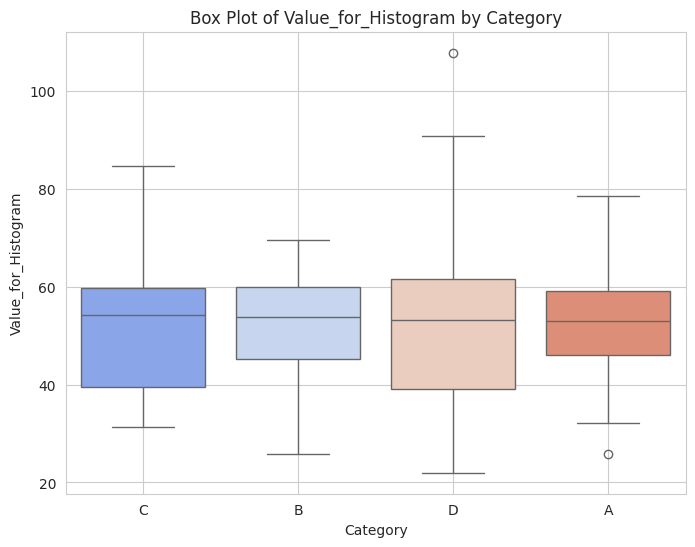

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Create a dataset with 100 random samples
np.random.seed(42) # for reproducibility

data = {
    'Feature_X': np.random.randint(0, 101, 100),
    'Feature_Y': np.random.randint(0, 101, 100),
    'Category': np.random.choice(['A', 'B', 'C', 'D'], 100),
    'Value_for_Histogram': np.random.normal(loc=50, scale=15, size=100) # Normal distribution around 50
}
df_random = pd.DataFrame(data)

print("First 5 rows of the generated random dataset:")
print(df_random.head().to_markdown(index=False, numalign="left", stralign="left"))

# Set Seaborn style for better aesthetics
sns.set_style("whitegrid")

# 2. Generate Scatter Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Feature_X', y='Feature_Y', data=df_random, hue='Category', palette='viridis')
plt.title('Scatter Plot of Feature_X vs Feature_Y')
plt.xlabel('Feature_X')
plt.ylabel('Feature_Y')
plt.grid(True)
plt.savefig('scatter_plot.png')
# plt.close() # Close plot to free memory

# 3. Generate Pie Chart
plt.figure(figsize=(8, 8))
category_counts = df_random['Category'].value_counts()
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Distribution of Categories')
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.savefig('pie_chart.png')
# plt.close()

# 4. Generate Histogram
plt.figure(figsize=(8, 6))
sns.histplot(df_random['Value_for_Histogram'], bins=10, kde=True, color='skyblue')
plt.title('Histogram of Value for Histogram')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.savefig('histogram_plot.png')
# plt.close()

# 5. Generate Box Plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Category', y='Value_for_Histogram', data=df_random, hue='Category', palette='coolwarm', legend=False)
plt.title('Box Plot of Value_for_Histogram by Category')
plt.xlabel('Category')
plt.ylabel('Value_for_Histogram')
plt.grid(True)
plt.savefig('box_plot.png')
# plt.close()

print("\nGenerated scatter_plot.png, pie_chart.png, histogram_plot.png, and box_plot.png.")

**Part 3: Dataset Analysis Use a dataset from the UCI Machine Learning Repository.**

a. Check for skewness and data imbalance.

b. Apply sampling techniques (e.g., SMOTE) to address any imbalance.

c. Perform basic transformations and generate plots (pairplot, correlation
matrix, histogram).

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Re-load the dataset to ensure a clean state, as previous operations might have modified it in memory
# If the kernel resets, df might not be available. Assuming it's consistently available based on previous turns.
# df = pd.read_csv('diabetes.csv') # Uncomment this line if df is not globally available

# Load the dataset
# raw URL of  dataset diabetes.csv file from GitHub
github_url = 'https://raw.githubusercontent.com/Ishaanidisha/CS460-Machine-Learning/refs/heads/main/Datasets/diabetes.csv'

try:
    df = pd.read_csv(github_url)
    print("Dataset loaded successfully from GitHub.")
except Exception as e:
    print(f"Error loading dataset from GitHub: {e}")


print("--- Part a: Checking for Skewness and Data Imbalance ---")

# Check for skewness of numerical features
# Exclude the 'Outcome' column as it's a binary target, not a continuous feature for skewness analysis
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
if 'Outcome' in numerical_cols:
    numerical_cols.remove('Outcome')

print("\nSkewness of numerical features:")
print(df[numerical_cols].skew().to_markdown(numalign="left", stralign="left"))

# Check for data imbalance in the target variable 'Outcome'
print("\nDistribution of the target variable 'Outcome':")
outcome_counts = df['Outcome'].value_counts()
print(outcome_counts.to_markdown(numalign="left", stralign="left"))

if outcome_counts.min() / outcome_counts.max() < 0.5: # Simple heuristic for imbalance
    print("\nData is imbalanced as the minority class count is significantly lower than the majority class count.")
else:
    print("\nData appears to be relatively balanced.")

print("-" * 60)

# The next step will be to apply sampling techniques based on this imbalance check.

Dataset loaded successfully from GitHub.
--- Part a: Checking for Skewness and Data Imbalance ---

Skewness of numerical features:
|                          | 0         |
|:-------------------------|:----------|
| Pregnancies              | 0.901674  |
| Glucose                  | 0.173754  |
| BloodPressure            | -1.84361  |
| SkinThickness            | 0.109372  |
| Insulin                  | 2.27225   |
| BMI                      | -0.428982 |
| DiabetesPedigreeFunction | 1.91991   |
| Age                      | 1.1296    |

Distribution of the target variable 'Outcome':
| Outcome   | count   |
|:----------|:--------|
| 0         | 500     |
| 1         | 268     |

Data appears to be relatively balanced.
------------------------------------------------------------


In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter
import pandas as pd # Import pandas if it's not already imported in this cell

# Assuming df is your DataFrame loaded in a previous cell
# Define features (X) and target variable (y)
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Assuming X contains your features and y contains your target variable
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print(f"Original dataset shape: {Counter(y)}")
print(f"Resampled dataset shape: {Counter(y_resampled)}")

Original dataset shape: Counter({0: 500, 1: 268})
Resampled dataset shape: Counter({1: 500, 0: 500})



--- Part c: Basic Transformations and Generating Plots ---

Generating Pairplot for features: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Outcome']...
Pairplot saved as pairplot_selected_features.png

Generating Correlation Matrix Plot...
Correlation Matrix Plot saved as correlation_matrix.png

Generating Histograms for Numerical Features...
Histograms saved as histograms_numerical_features.png
------------------------------------------------------------


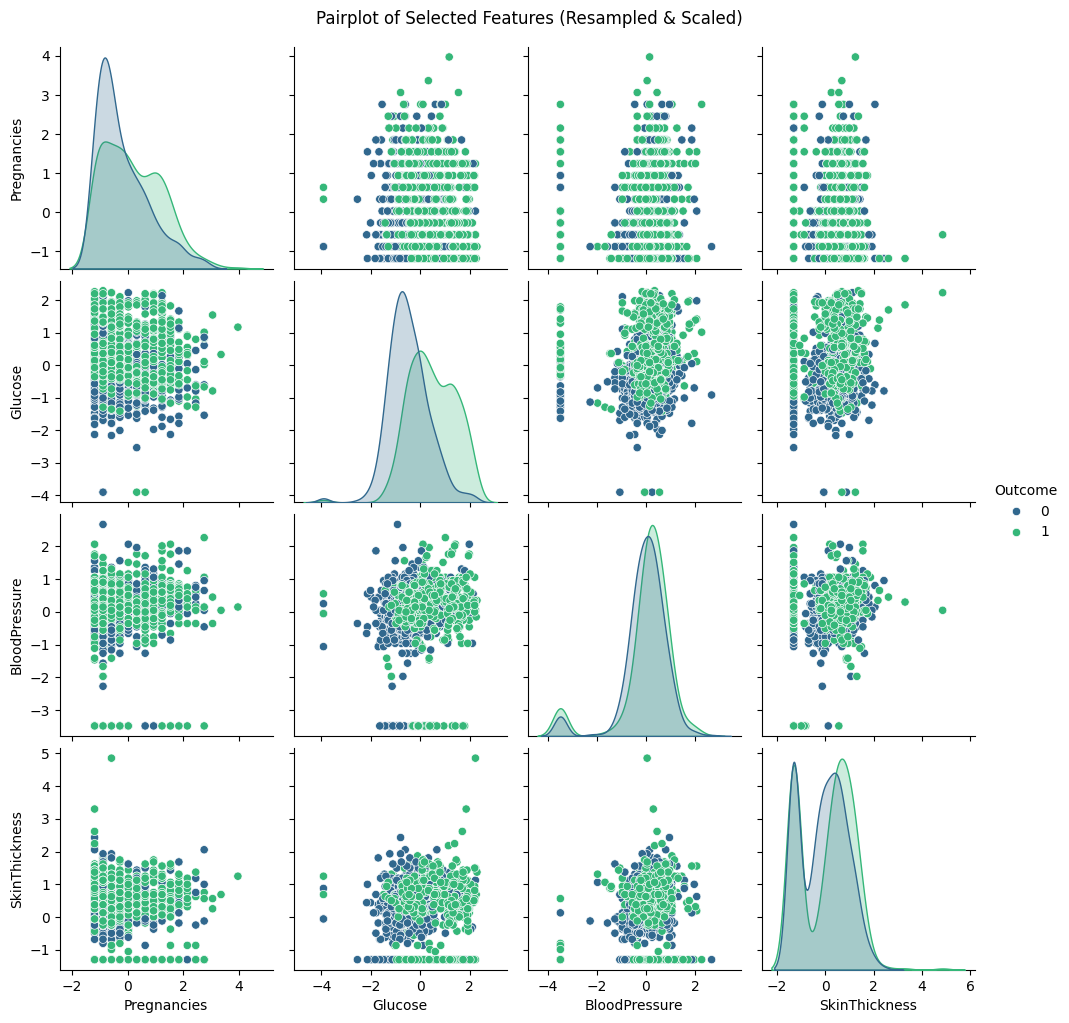

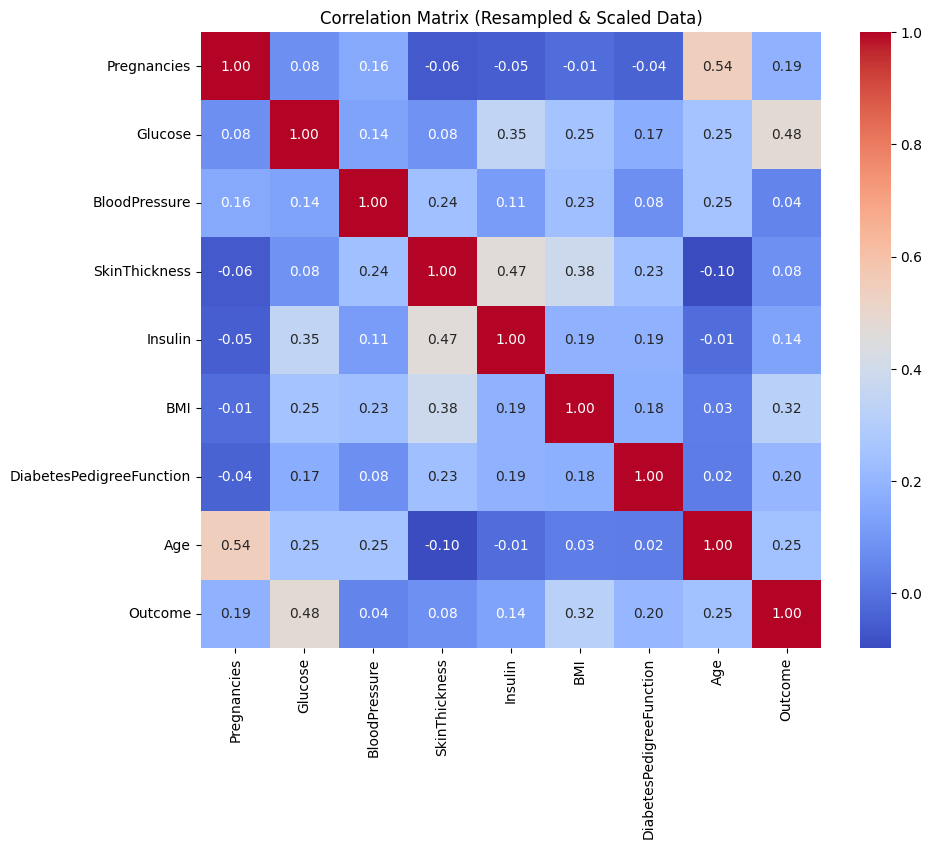

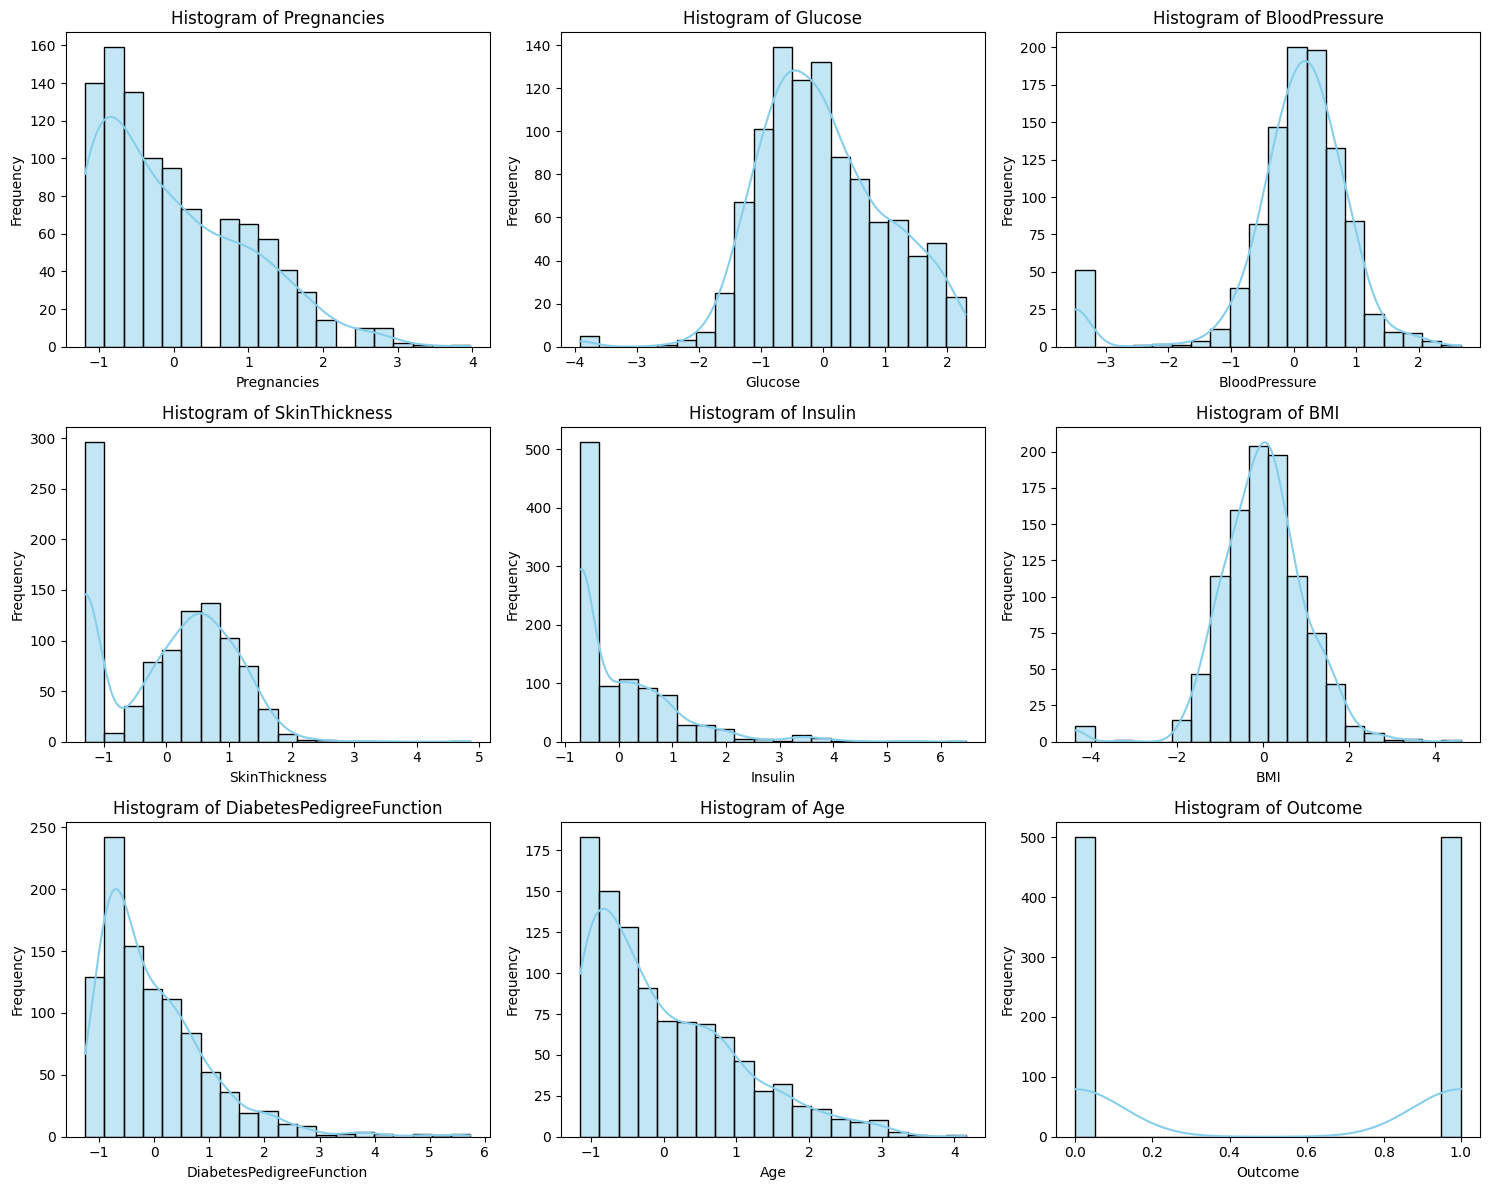

In [ ]:
# prompt: Perform basic transformations and generate plots (pairplot, correlation
# matrix, histogram)

print("\n--- Part c: Basic Transformations and Generating Plots ---")

# Standardize numerical features (common transformation before plotting or modeling)
scaler = StandardScaler()
X_resampled_scaled = scaler.fit_transform(X_resampled)

# Convert scaled features back to DataFrame for plotting
X_resampled_scaled_df = pd.DataFrame(X_resampled_scaled, columns=X.columns)

# Add the resampled target variable back for plotting
df_resampled_scaled = X_resampled_scaled_df.copy()
df_resampled_scaled['Outcome'] = y_resampled

# 1. Generate Pairplot
# Due to the number of features, generating a pairplot for the entire dataset can be slow and visually cluttered.
# Let's select a subset of features for the pairplot.
# Selecting first 4 features + the Outcome
features_for_pairplot = df_resampled_scaled.columns[:4].tolist() + ['Outcome']

print(f"\nGenerating Pairplot for features: {features_for_pairplot}...")
sns.pairplot(df_resampled_scaled[features_for_pairplot], hue='Outcome', palette='viridis')
plt.suptitle('Pairplot of Selected Features (Resampled & Scaled)', y=1.02) # Add a title
plt.savefig('pairplot_selected_features.png')
# plt.close()
print("Pairplot saved as pairplot_selected_features.png")

# 2. Generate Correlation Matrix Plot (Heatmap)
print("\nGenerating Correlation Matrix Plot...")
plt.figure(figsize=(10, 8))
# Calculate the correlation matrix on the scaled and resampled data
correlation_matrix = df_resampled_scaled.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix (Resampled & Scaled Data)')
plt.savefig('correlation_matrix.png')
# plt.close()
print("Correlation Matrix Plot saved as correlation_matrix.png")

# 3. Generate Histograms for each numerical feature
print("\nGenerating Histograms for Numerical Features...")
num_cols = df_resampled_scaled.select_dtypes(include=np.number).columns.tolist()

# Define number of columns per row for subplots
n_cols = 3
n_rows = (len(num_cols) + n_cols - 1) // n_cols # Calculate number of rows needed

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 4))
axes = axes.flatten() # Flatten the array of axes for easy iteration

for i, col in enumerate(num_cols):
    sns.histplot(df_resampled_scaled[col], bins=20, kde=True, ax=axes[i], color='skyblue')
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.savefig('histograms_numerical_features.png')
# plt.close()
print("Histograms saved as histograms_numerical_features.png")

print("-" * 60)